In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.objects import GenerationClass
from utils.config import color_maps, ycb_heights
import os
from glob import glob
from scipy import sparse
from PIL import Image
import json
from mani_skill2.envs.pick_and_place.pick_cube import PickCubeEnv
from mani_skill2.utils.sapien_utils import look_at
from mani_skill2.sensors.camera import CameraConfig
from mani_skill2.utils.registration import register_env
from pathlib import Path
import gymnasium as gym
from sapien.core import Pose
import numpy as np
from transforms3d.euler import euler2quat, quat2euler
from utils.config import ycb_heights, color_maps
from glob import glob
from scipy import sparse
from PIL import Image
import json
import os

from IPython.display import clear_output
# save_dir = "../final_data/"
# move_one_dir = os.path.join(save_dir, "move")
# move_cube_dir = os.path.join(move_one_dir, "cube")
# move_ycb_dir = os.path.join(move_one_dir, "ycb")
# os.makedirs(move_one_dir, exist_ok=True)
# os.makedirs(move_cube_dir, exist_ok=True)
# os.makedirs(move_ycb_dir, exist_ok=True)

In [2]:
from mani_skill2.envs.pick_and_place.pick_cube import PickCubeEnv
from utils.avoid_collision import AvoidCollision


generator = AvoidCollision()

In [3]:
generator.generate(10, random_trials = 5, data_dir="../final_data/cube/avoid_collision")

[2024-04-11 21:34:12.532] [svulkan2] [error] GLFW error: X11: The DISPLAY environment variable is missing
[2024-04-11 21:34:12.532] [svulkan2] [warning] Continue without GLFW.
/home/mkim/miniconda3/envs/mixlab/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.cube_half_size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.cube_half_size` for environment variables or `env.get_wrapper_attr('cube_half_size')` that will search the reminding wrappers.
  logger.warn(


Saved data for 0-0
Saved data for 0-1
Saved data for 0-2
Saved data for 0-3


2024-04-11 21:34:18,826 - mani_skill2 - WARNING - Override registered env CustomEnv-v0


Saved data for 0-4


[2024-04-11 21:34:18.827] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.


Saved data for 1-0
Saved data for 1-1
Saved data for 1-2
Saved data for 1-3


2024-04-11 21:34:26,255 - mani_skill2 - WARNING - Override registered env CustomEnv-v0


Saved data for 1-4


[2024-04-11 21:34:26.255] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.


Saved data for 2-0
Saved data for 2-1
Saved data for 2-2
Saved data for 2-3


2024-04-11 21:34:56,977 - mani_skill2 - WARNING - Override registered env CustomEnv-v0


No path found for 2-4


[2024-04-11 21:34:56.978] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.


Saved data for 3-0
Saved data for 3-1


KeyboardInterrupt: 

/home/mkim/miniconda3/envs/mixlab/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.cube_half_size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.cube_half_size` for environment variables or `env.get_wrapper_attr('cube_half_size')` that will search the reminding wrappers.
  logger.warn(


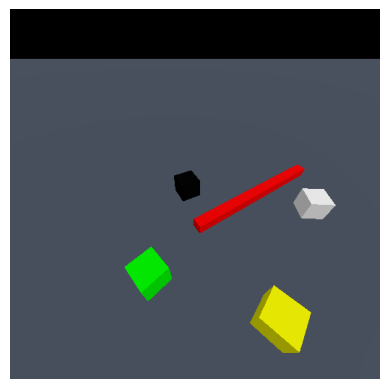

In [3]:
import numpy as np
unit = env.cube_half_size[0]
cube_size = unit * scale

# Initial obstacle position and orientation
obstacle_initial_x = np.random.randn() * 12 * unit
obstacle_initial_y = np.random.randn() * 12 * unit
angle = np.random.uniform(0, 2*np.pi)  # Random angle

# Initialize the list of existing positions
existing_positions = []

# initialize positions of obstacles
for i, obj in enumerate(env.unwrapped.obstacles):
    x = obstacle_initial_x + (i-len(env.unwrapped.obstacles)/2) * cube_size * np.cos(angle)
    y = obstacle_initial_y + (i-len(env.unwrapped.obstacles)/2) * cube_size * np.sin(angle)
    existing_positions.append([x, y, "obstacle"])
    obj.set_pose(Pose([x, y, unit*2], euler2quat(0, 0, angle)))

# Function to check if a point is above the dividing line
def is_above_line(x, y, line_angle, pivot_x, pivot_y):
    # Calculate the y-coordinate on the line for the given x
    y_on_line = np.tan(line_angle) * (x - pivot_x) + pivot_y
    return y > y_on_line

# Function to generate a random position for a cube
def generate_cube_position(above,obj,  pivot_x, pivot_y, angle, existing_positions, cube_size):
    for _ in range(1000):  # Max attempts to find a valid position
        x = np.random.uniform(-45, 45) * unit
        y = np.random.uniform(-45, 45) * unit
        # Check if the position is on the desired side of the line and away from existing positions
        if is_above_line(x, y, angle, pivot_x, pivot_y) == above and all(np.linalg.norm([x - ex_x, y - ex_y]) > 4*cube_size for ex_x, ex_y, _ in existing_positions):
            obj.set_pose(Pose([x, y, cube_size], euler2quat(0, 0, np.random.uniform(0, 2*np.pi))))
            return x, y
    raise ValueError("Failed to find a valid position for the cube")


# Generate position for the single cube on one specific side (e.g., above the line)

single_cube_x, single_cube_y = generate_cube_position(True, env.unwrapped.objs[0], obstacle_initial_x, obstacle_initial_y, angle, existing_positions, cube_size)
existing_positions.append([single_cube_x, single_cube_y,  env.unwrapped.objs[0].name])

# Generate positions for the remaining cubes on the other side
for obj in env.unwrapped.objs[1:]:
    cube_x, cube_y = generate_cube_position(False, obj, obstacle_initial_x, obstacle_initial_y, angle, existing_positions, cube_size)
    existing_positions.append([cube_x, cube_y, obj.name])


obs, _, _, _, _ = env.step(env.action_space.sample())
img = obs["image"]["base_camera"]["rgb"]
plt.imshow(img)
plt.axis('off')
plt.show()

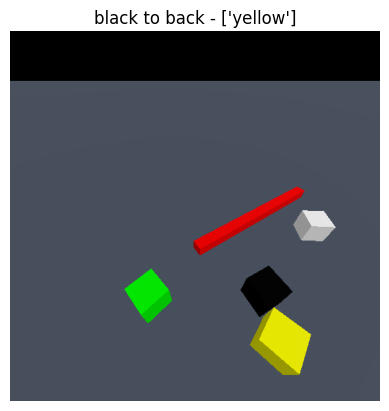

In [41]:
starting_cube_name = env.unwrapped.objs[0].name

directions = ["between", "left", "right", "front", "back"]
direction = np.random.choice(directions)
# direction = "right"

if direction == "between": selected_n = 2
else: selected_n = 1

ending_cube_names = np.random.choice([obj.name for obj in env.unwrapped.objs[1:]], selected_n, replace=False)

grid_size = 200
grid, start, goal = get_grid_from_existing_positions(starting_cube_name, ending_cube_names, existing_positions, unit, scale, direction, grid_size)

a_star_positions = [(p[0], p[1]) for p in np.stack(np.where(grid == 1), 1)]

path = a_star_with_avoidance(start, goal, a_star_positions, scale*4, grid_size)

if path:
	# print("Found path:", path)
	path_grid = grid.copy()
	for p in path:
		path_grid[p[0], p[1]] = 2
	# plt.imshow(path_grid[::-1, ::-1])

	# convert to xy coordinates
	xy_path = np.array([(np.array(p) - grid_size/2)*unit for p in path])

	obj = [obj for obj in env.unwrapped.objs if obj.name == starting_cube_name][0]
	initial_pose = obj.get_pose()
	obj.set_pose(initial_pose)
	for i in range(xy_path.shape[0]):
		obj.set_pose(Pose([xy_path[i][0], xy_path[i][1], cube_size], obj.get_pose().q))
		if i % 9 == 0 or i == xy_path.shape[0] - 1:
			clear_output(wait=True)
			obs, _, _, _, _ = env.step(env.action_space.sample())
			img = obs["image"]["base_camera"]["rgb"]
			plt.imshow(img)
			plt.title(f"{env.unwrapped.objs[0].name} to {direction} - {ending_cube_names}")
			plt.axis('off')
			plt.show()

else:
	print("No path found.")
	grid[start[0], start[1]] = 2
	grid[goal[0], goal[1]] = 2
	plt.imshow(grid[::-1, ::-1])
	print("direction:", direction, "cube names:", ending_cube_names)

In [2]:
# model_paths = sorted(glob("../data/mani_skill2_ycb/models/*"), key=lambda x: int(x.split('/')[-1][:3]))
model_paths = sorted(glob("../models/*/mesh.obj"))

gen = GenerationClass(model_paths)

In [3]:
n = 20
# gen.generate(1, "place_object_in_direction", n)
# gen.generate(3, "place_object_in_direction", n, object="object")
# gen.generate(3, "place_object_in_direction", n)
# gen.generate(4, "place_object_in_direction", n)

# gen.generate(2, "place_object_on_another", n)
# gen.generate(3, "place_object_on_another", n)
# gen.generate(4, "place_object_on_another", n)

# gen.generate(3, "place_object_in_between", n)

# gen.generate(3, "remove_object", n)

# gen.generate(3, "order_by_color", n)

# gen.generate(2, "move_object", n)

gen.generate(3, "move_object_toward_another", n)

2024-04-10 21:14:05,675 - mani_skill2 - WARNING - Override registered env CustomEnv-v0


[2024-04-10 21:14:05.675] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.


KeyboardInterrupt: 

In [ ]:
from utils.run_tsr import process_images
from utils.conver_color import convert

In [ ]:
names = sorted([i[:-4] for i in os.listdir('../data/object_images')])
names = [i for i in names if i not in os.listdir("../models")]
# for path in glob("../models/*"):
#     # rename to lower case
#     os.rename(path, path.lower())

In [ ]:
idx = 0

In [ ]:
idx += 1

In [ ]:
name = names[idx]
name

In [ ]:
process_images([f"../data/object_images/{name}.png"],
               output_dir=f"../models/{name}", foreground_ratio=0.8)
convert(f"../models/{name}/0/mesh.obj", f"../models/{name}")

In [ ]:
names = sorted([i[:-4] for i in os.listdir('../data/object_images')])

In [ ]:
for name in names:
    obj_cfgs, camera_cfgs = gen.model_configs(1, [name])
    obj_cfgs[0]["scale"] = 1.5
    env = gen.get_env(obj_cfgs, camera_cfgs)
    gen.initialize_positions(1, obj_cfgs)
    gen.brightness = 30

    for i in range(1):
        # env.obj.set_pose(Pose([0, 0, 0.25], env.obj.get_pose().q))
        obs, _, _, _, _ = env.step(env.action_space.sample())
        # clear_output(wait=True)
        plt.imshow(gen.get_image(obs, "none"))
        plt.title(name)
        plt.show()


In [ ]:
import shutil


def remove(name):
    shutil.rmtree(f"../models/{name}")
    os.remove("../data/object_images/" + name + ".png")

In [ ]:
remove(name)

In [ ]:
n = 4
fig, axs = plt.subplots(1, 2)
for model in models:
    # chosing models
    other_models = [m for m in models if m != model]
    other_model = np.random.choice(other_models, n-1, replace=False)
    other_model = [model] + list(other_model)
    obj_cfgs, camera_cfgs = gen.model_configs(n, other_model)
    env = gen.get_env(obj_cfgs, camera_cfgs)

    gen.initialize_positions(n, obj_cfgs)

    obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
    img = obs['image']["base_camera"]["rgb"]
    img = gen.get_image(obs, "object")

    axs[0].imshow(img)

    direction = "forward"
    rand_obj = np.random.choice(gen.env.objs)
    gen.place_object_in_direction(rand_obj, direction)

    obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
    img = gen.get_image(obs, "object")
    axs[1].imshow(img)
    plt.suptitle(f"{rand_obj.name} {direction}")
    plt.show()
    break

In [ ]:
other_model